<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/synth%20ver%201.1/out-model-v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Module Imports for Data Processing

In [2]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

In [3]:
dfgurl =  "https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/synth%20ver%201.1/dataset/out-good.csv?token=AKVFSOHAJPC3V4GNWOBEWAC6YQN7A"
dfmurl =  "https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/synth%20ver%201.1/dataset/out-mal.csv?token=AKVFSOCJM3VSUFSV4WPVNQK6YQOCO"

dfg = pd.read_csv(dfgurl)
dfm = pd.read_csv(dfmurl, nrows=16503)

Characteristics of Dataset

In [4]:
dfg

timestamp  outport  inport  flit_id  flit_type  vnet  vc  src_ni  \
0             11        2       0        1          4     2   5       0   
1             15        2       4        1          4     2   5       0   
2             19        2       4        1          4     2   5       0   
3             22        2       0        1          4     2   6       0   
4             23        1       4        1          4     2   5       0   
...          ...      ...     ...      ...        ...   ...  ..     ...   
16498       9918        2       4        4          2     3  10       0   
16499       9918        1       3        4          2     3   9       0   
16500       9918        1       3        1          4     2   5       0   
16501       9918        1       4        5          3     3   9       0   
16502       9918        2       4        5          3     3  10       0   

       src_router  dst_ni  ...  enqueue_time  packet_count_decr  \
0               0      31  ...             4                164   
1               0      31  ...             8                163   
2               0      31  ...            12                162   
3               0      31  ...             4                161   
4               0      31  ...            16                160   
...           ...     ...  ...           ...                ...   
16498           0      31  ...            16                  5   
16499           0      31  ...            23                  4   
16500           0      31  ...            24                  3   
16501           0      31  ...            23                  2   
16502           0      31  ...            16                  1   

       packet_count_incr  max_packet_count  packet_count_index  \
0                      1               164                 164   
1                      2               164                 326   
2                      3               164                 486   
3                      4               164                 644   
4                      5               164                 800   
...                  ...               ...                 ...   
16498                 44                48                 220   
16499                 45                48                 180   
16500                 46                48                 138   
16501                 47                48                  94   
16502                 48                48                  48   

       packet_max_index  port_index  flit_index  vnet_vc_index  target  
0                 26896           0           4             10       1  
1                 53464           8           4             10       1  
2                 79704           8           4             10       1  
3                105616           0           4             12       1  
4                131200           4           4             10       1  
...                 ...         ...         ...            ...     ...  
16498             10560           8           8             30       1  
16499              8640           3           8             27       1  
16500              6624           3           4             10       1  
16501              4512           4          15             27       1  
16502              2304           8          15             30       1  

[16503 rows x 31 columns]

In [5]:
dfm

timestamp  outport  inport  flit_id  flit_type  vnet  vc  src_ni  \
0              7        2       0        1          4     2   5       9   
1              7        1       0        1          4     2   5      11   
2              8        1       0        1          4     2   6      11   
3              9        1       0        1          4     2   7      11   
4              9        2       0        1          1     3   9       9   
...          ...      ...     ...      ...        ...   ...  ..     ...   
16498       5376        2       0        5          3     3   9      13   
16499       5376        0       4        1          4     1   4      12   
16500       5377        2       4        4          2     3  10      13   
16501       5377        1       3        1          4     1   1       2   
16502       5377        0       0        1          1     3   9      15   

       src_router  dst_ni  ...  enqueue_time  packet_count_decr  \
0               9      31  ...             4                646   
1              11      31  ...             4                645   
2              11      31  ...             4                644   
3              11      31  ...             4                643   
4               9      31  ...             4                642   
...           ...     ...  ...           ...                ...   
16498          13      31  ...          1077                 87   
16499          12      31  ...            28                 86   
16500          13      31  ...          1078                 85   
16501           2      31  ...           162                 84   
16502          15      31  ...             5                 83   

       packet_count_incr  max_packet_count  packet_count_index  \
0                      1               646                 646   
1                      2               646                1290   
2                      3               646                1932   
3                      4               646                2572   
4                      5               646                3210   
...                  ...               ...                 ...   
16498                234               320               20358   
16499                235               320               20210   
16500                236               320               20060   
16501                237               320               19908   
16502                238               320               19754   

       packet_max_index  port_index  flit_index  vnet_vc_index  target  
0                417316           0           4             10       0  
1                833340           0           4             10       0  
2               1248072           0           4             12       0  
3               1661512           0           4             14       0  
4               2073660           0           1             27       0  
...                 ...         ...         ...            ...     ...  
16498           6514560           0          15             27       0  
16499           6467200           0           4              4       0  
16500           6419200           8           8             30       0  
16501           6370560           3           4              1       0  
16502           6321280           0           1             27       0  

[16503 rows x 40 columns]

In [6]:
df = dfm.append(dfg, ignore_index=True,sort=False)

In [7]:
df.isnull().sum()

timestamp                 0
outport                   0
inport                    0
flit_id                   0
flit_type                 0
vnet                      0
vc                        0
src_ni                    0
src_router                0
dst_ni                    0
dst_router                0
router_0                  0
router_1                  0
router_2                  0
router_3                  0
router_4              16503
router_5              16503
router_6              16503
router_7                  0
router_8              16503
router_9              16503
router_10             16503
router_11                 0
router_12             16503
router_13             16503
router_14             16503
router_15                 0
hop_count                 0
current_hop               0
hop_percentage            0
enqueue_time              0
packet_count_decr         0
packet_count_incr         0
max_packet_count          0
packet_count_index        0
packet_max_index    

In [8]:
df = df.fillna(0)

In [9]:
df.isnull().sum()

timestamp             0
outport               0
inport                0
flit_id               0
flit_type             0
vnet                  0
vc                    0
src_ni                0
src_router            0
dst_ni                0
dst_router            0
router_0              0
router_1              0
router_2              0
router_3              0
router_4              0
router_5              0
router_6              0
router_7              0
router_8              0
router_9              0
router_10             0
router_11             0
router_12             0
router_13             0
router_14             0
router_15             0
hop_count             0
current_hop           0
hop_percentage        0
enqueue_time          0
packet_count_decr     0
packet_count_incr     0
max_packet_count      0
packet_count_index    0
packet_max_index      0
port_index            0
flit_index            0
vnet_vc_index         0
target                0
dtype: int64

In [10]:
df = df.sort_values('timestamp')
df.to_csv('out-model-v3.csv',index=False)

In [11]:
df = pd.read_csv("out-model-v3.csv")
df

timestamp  outport  inport  flit_id  flit_type  vnet  vc  src_ni  \
0              7        2       0        1          4     2   5       9   
1              7        1       0        1          4     2   5      11   
2              8        1       0        1          4     2   6      11   
3              9        1       0        1          4     2   7      11   
4              9        2       0        1          1     3   9       9   
...          ...      ...     ...      ...        ...   ...  ..     ...   
33001       9918        1       3        1          4     2   5       0   
33002       9918        1       4        5          3     3   9       0   
33003       9918        2       4        4          2     3  10       0   
33004       9918        1       3        4          2     3   9       0   
33005       9918        2       4        5          3     3  10       0   

       src_router  dst_ni  ...  enqueue_time  packet_count_decr  \
0               9      31  ...             4                646   
1              11      31  ...             4                645   
2              11      31  ...             4                644   
3              11      31  ...             4                643   
4               9      31  ...             4                642   
...           ...     ...  ...           ...                ...   
33001           0      31  ...            24                  3   
33002           0      31  ...            23                  2   
33003           0      31  ...            16                  5   
33004           0      31  ...            23                  4   
33005           0      31  ...            16                  1   

       packet_count_incr  max_packet_count  packet_count_index  \
0                      1               646                 646   
1                      2               646                1290   
2                      3               646                1932   
3                      4               646                2572   
4                      5               646                3210   
...                  ...               ...                 ...   
33001                 46                48                 138   
33002                 47                48                  94   
33003                 44                48                 220   
33004                 45                48                 180   
33005                 48                48                  48   

       packet_max_index  port_index  flit_index  vnet_vc_index  target  
0                417316           0           4             10       0  
1                833340           0           4             10       0  
2               1248072           0           4             12       0  
3               1661512           0           4             14       0  
4               2073660           0           1             27       0  
...                 ...         ...         ...            ...     ...  
33001              6624           3           4             10       1  
33002              4512           4          15             27       1  
33003             10560           8           8             30       1  
33004              8640           3           8             27       1  
33005              2304           8          15             30       1  

[33006 rows x 40 columns]

In [12]:
df = df.drop(columns=['dst_ni','dst_router'])

In [13]:
df.corr()

timestamp   outport    inport   flit_id  flit_type  \
timestamp            1.000000  0.066529  0.110093  0.151887  -0.188553   
outport              0.066529  1.000000 -0.113402  0.019620  -0.027464   
inport               0.110093 -0.113402  1.000000  0.020038  -0.023770   
flit_id              0.151887  0.019620  0.020038  1.000000  -0.404970   
flit_type           -0.188553 -0.027464 -0.023770 -0.404970   1.000000   
vnet                 0.188636  0.021751  0.018156  0.647741  -0.831157   
vc                   0.150795  0.006759 -0.063926  0.618491  -0.794074   
src_ni              -0.346438 -0.182589 -0.271759 -0.187278   0.237782   
src_router          -0.346438 -0.182589 -0.271759 -0.187278   0.237782   
router_0             0.113850  0.316635 -0.485370  0.087891  -0.112508   
router_1             0.097001  0.335671  0.177127  0.066672  -0.084371   
router_2             0.083322  0.354843  0.194387  0.042480  -0.054242   
router_3             0.062972 -0.065617  0.189801  0.018160  -0.023022   
router_4            -0.045822  0.041813 -0.064096  0.009949  -0.016990   
router_5            -0.053163  0.050310 -0.025702  0.010196  -0.014698   
router_6            -0.052811  0.054236  0.001153  0.012810  -0.023005   
router_7             0.032412 -0.071327 -0.005582  0.012426  -0.015009   
router_8            -0.053812  0.108167 -0.165810 -0.051413   0.063471   
router_9            -0.067113  0.121079  0.023687 -0.047295   0.060064   
router_10           -0.071057  0.152320 -0.017629 -0.044975   0.055507   
router_11           -0.018426 -0.082834  0.031849 -0.010294   0.014067   
router_12           -0.059931  0.133512 -0.204661 -0.040623   0.050249   
router_13           -0.080221  0.184326 -0.062332 -0.073926   0.094559   
router_14           -0.092397  0.229278 -0.006237 -0.090566   0.114808   
router_15           -0.087965 -0.822785  0.022791 -0.024807   0.033081   
hop_count            0.370925  0.296524  0.340411  0.209280  -0.266287   
current_hop          0.203431 -0.516934  0.494110  0.103439  -0.129704   
hop_percentage       0.040211 -0.706046  0.574890 -0.017533   0.024921   
enqueue_time        -0.058183 -0.065838  0.045501  0.042850  -0.036818   
packet_count_decr   -0.220436 -0.002467 -0.083239 -0.106311   0.104830   
packet_count_incr   -0.207914 -0.073034 -0.087413 -0.091992   0.133623   
max_packet_count    -0.417652 -0.073525 -0.166378 -0.193361   0.232453   
packet_count_index  -0.320392 -0.020738 -0.103001 -0.099268   0.114960   
packet_max_index    -0.290678  0.013557 -0.081406 -0.060089   0.062060   
port_index           0.117413  0.564434  0.671646  0.056311  -0.072365   
flit_index           0.086968  0.009469  0.012047  0.899362  -0.015131   
vnet_vc_index        0.177271  0.021154 -0.030907  0.670645  -0.860936   
target               0.462285  0.181371  0.226172  0.348721  -0.442219   

                        vnet        vc    src_ni  src_router  router_0  ...  \
timestamp           0.188636  0.150795 -0.346438   -0.346438  0.113850  ...   
outport             0.021751  0.006759 -0.182589   -0.182589  0.316635  ...   
inport              0.018156 -0.063926 -0.271759   -0.271759 -0.485370  ...   
flit_id             0.647741  0.618491 -0.187278   -0.187278  0.087891  ...   
flit_type          -0.831157 -0.794074  0.237782    0.237782 -0.112508  ...   
vnet                1.000000  0.961591 -0.216626   -0.216626  0.110123  ...   
vc                  0.961591  1.000000 -0.140470   -0.140470  0.172774  ...   
src_ni             -0.216626 -0.140470  1.000000    1.000000 -0.212231  ...   
src_router         -0.216626 -0.140470  1.000000    1.000000 -0.212231  ...   
router_0            0.110123  0.172774 -0.212231   -0.212231  1.000000  ...   
router_1            0.079147  0.049476 -0.218535   -0.218535 -0.086690  ...   
router_2            0.047208  0.010793 -0.219361   -0.219361 -0.091641  ...   
router_3            0.019427 -0.006314 -0.213145   -0.213145 -0.098095  ...   
router_4            0.01699

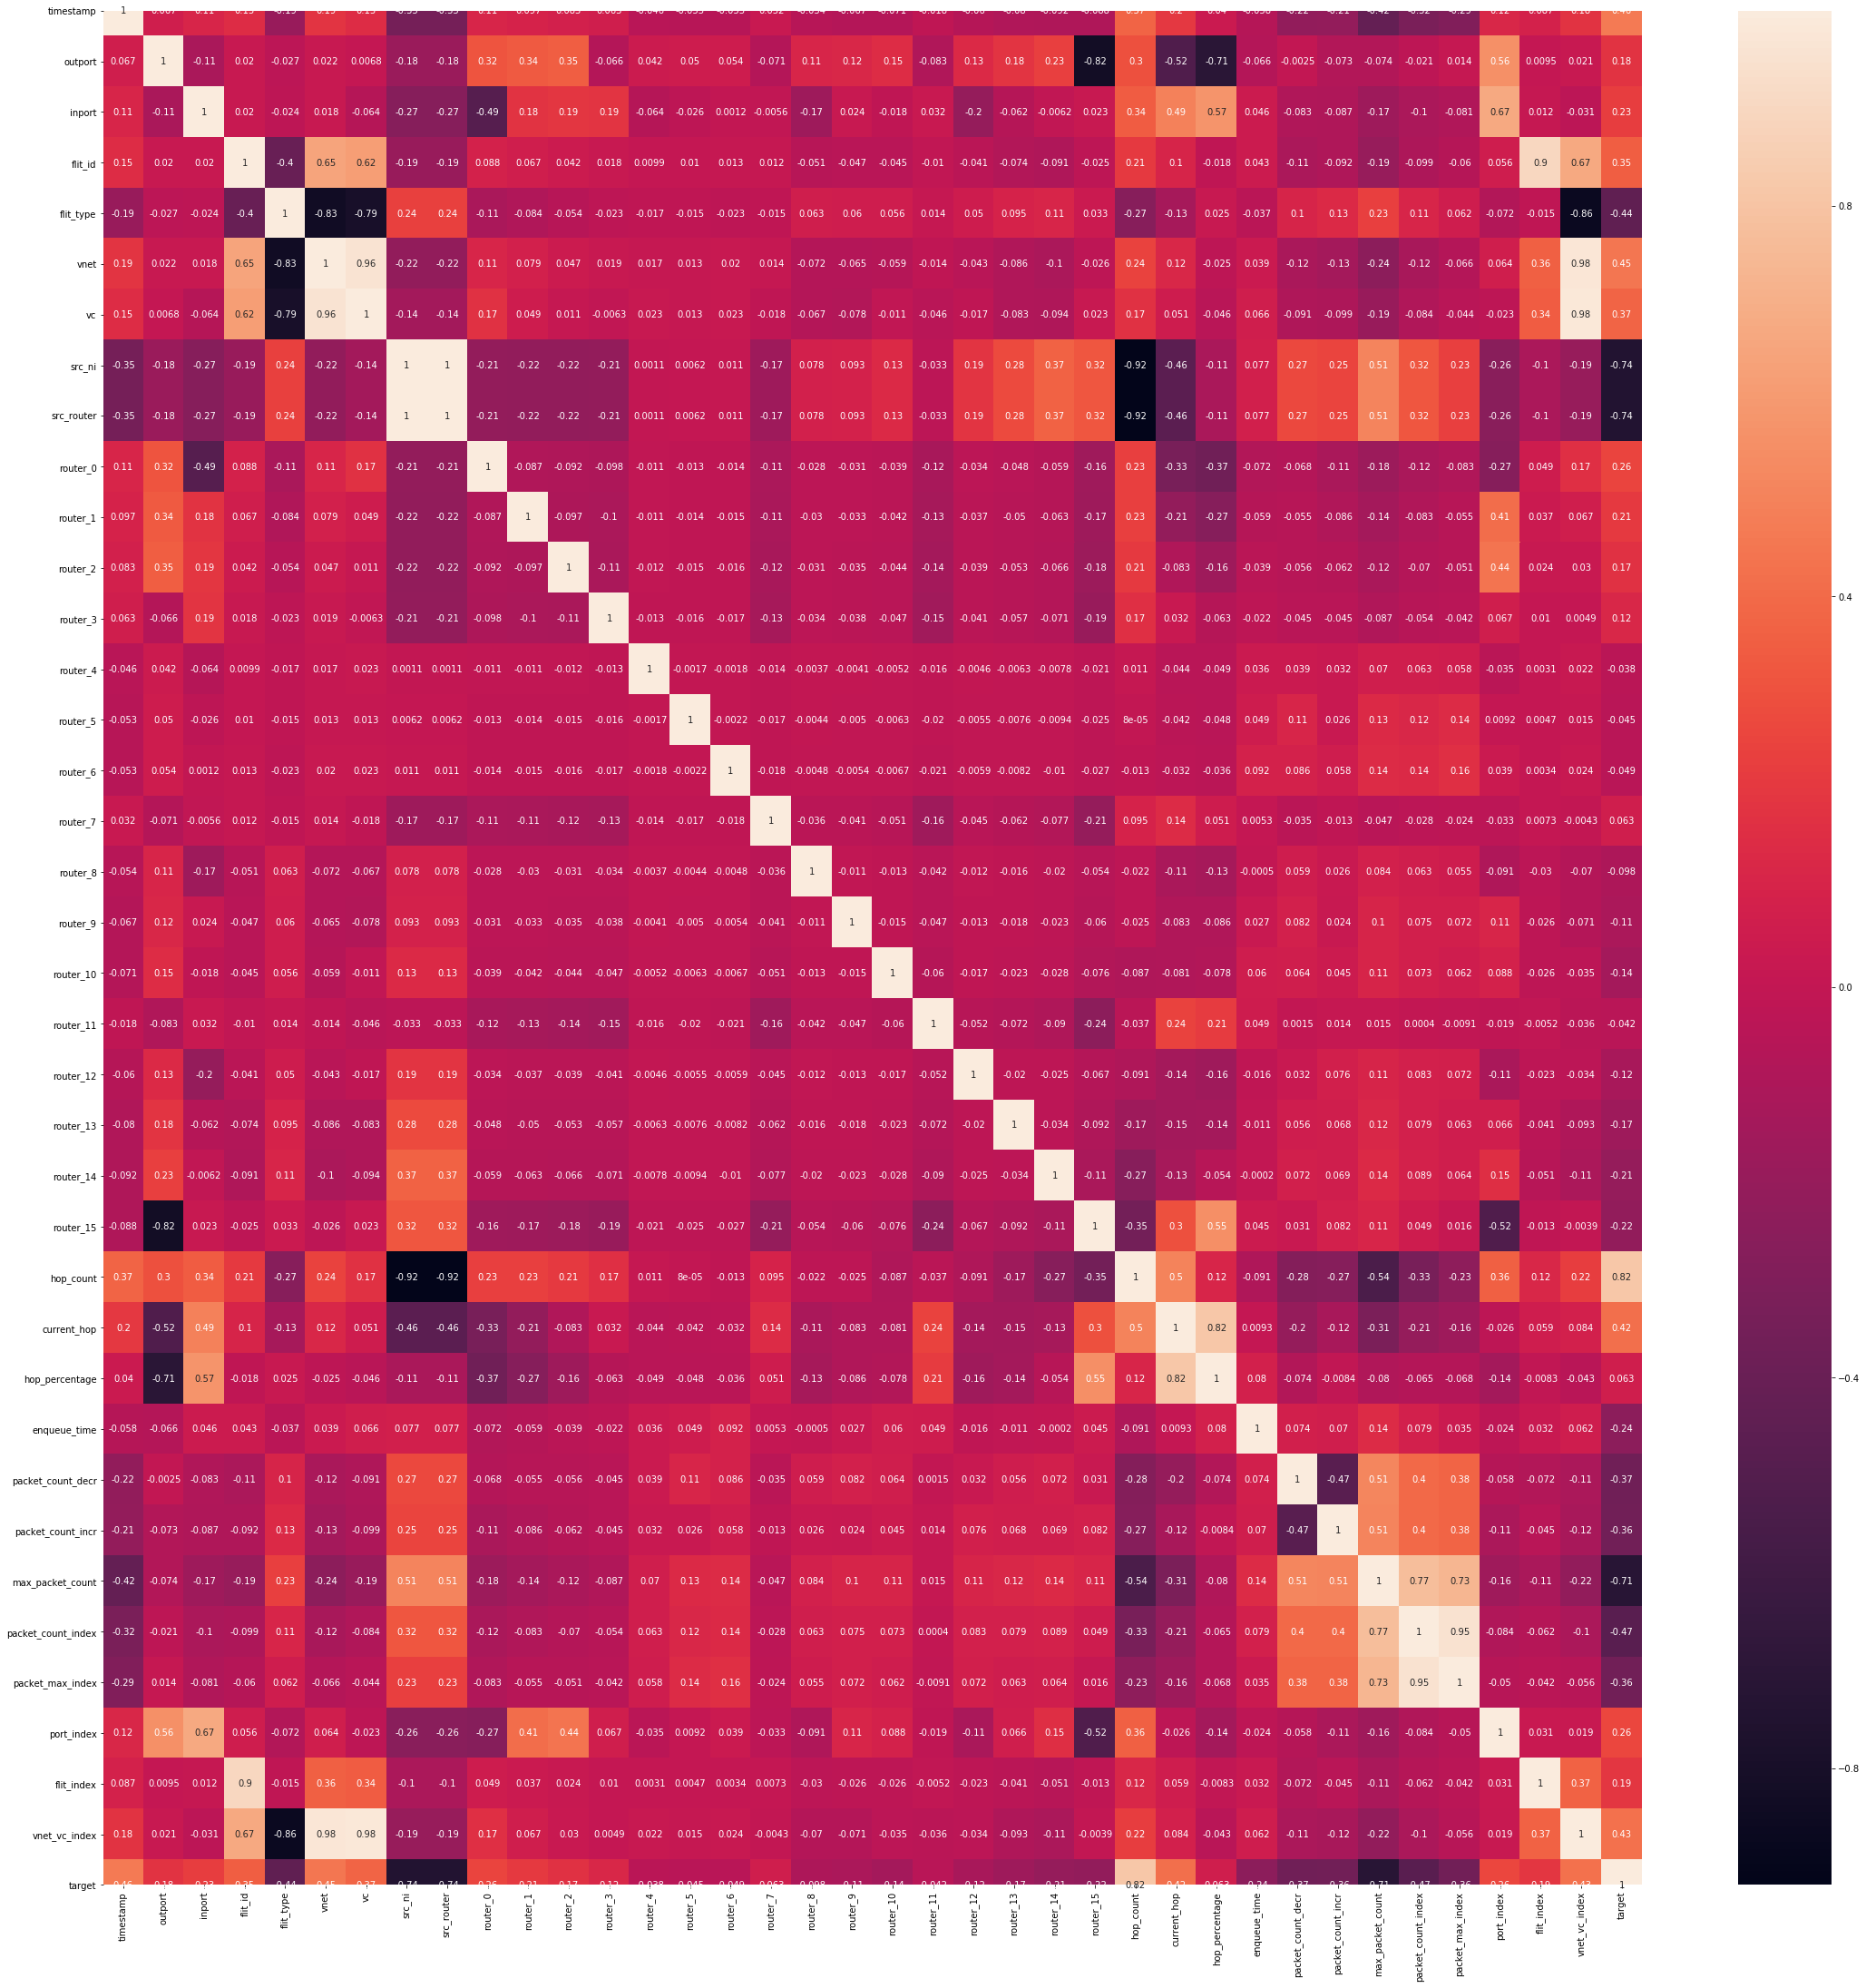

In [14]:
plt.figure(figsize=(38,38))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [15]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [16]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_index', 'vnet', 'hop_count', 'src_ni', 'packet_count_index']

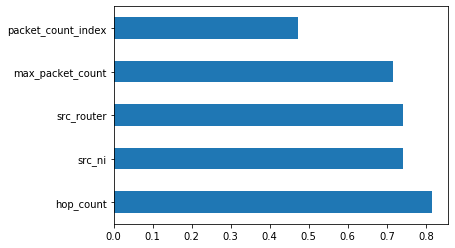

In [17]:
corr = df.corr()
linear_features=abs(corr).target.drop('target').sort_values(ascending=False)[:10].keys()
abs(corr).target.drop('target').sort_values(ascending=False)[:5].plot(kind='barh')

In [18]:
df = df.drop(columns=['src_router','src_ni'])

In [19]:
df.corr()

timestamp   outport    inport   flit_id  flit_type  \
timestamp            1.000000  0.066529  0.110093  0.151887  -0.188553   
outport              0.066529  1.000000 -0.113402  0.019620  -0.027464   
inport               0.110093 -0.113402  1.000000  0.020038  -0.023770   
flit_id              0.151887  0.019620  0.020038  1.000000  -0.404970   
flit_type           -0.188553 -0.027464 -0.023770 -0.404970   1.000000   
vnet                 0.188636  0.021751  0.018156  0.647741  -0.831157   
vc                   0.150795  0.006759 -0.063926  0.618491  -0.794074   
router_0             0.113850  0.316635 -0.485370  0.087891  -0.112508   
router_1             0.097001  0.335671  0.177127  0.066672  -0.084371   
router_2             0.083322  0.354843  0.194387  0.042480  -0.054242   
router_3             0.062972 -0.065617  0.189801  0.018160  -0.023022   
router_4            -0.045822  0.041813 -0.064096  0.009949  -0.016990   
router_5            -0.053163  0.050310 -0.025702  0.010196  -0.014698   
router_6            -0.052811  0.054236  0.001153  0.012810  -0.023005   
router_7             0.032412 -0.071327 -0.005582  0.012426  -0.015009   
router_8            -0.053812  0.108167 -0.165810 -0.051413   0.063471   
router_9            -0.067113  0.121079  0.023687 -0.047295   0.060064   
router_10           -0.071057  0.152320 -0.017629 -0.044975   0.055507   
router_11           -0.018426 -0.082834  0.031849 -0.010294   0.014067   
router_12           -0.059931  0.133512 -0.204661 -0.040623   0.050249   
router_13           -0.080221  0.184326 -0.062332 -0.073926   0.094559   
router_14           -0.092397  0.229278 -0.006237 -0.090566   0.114808   
router_15           -0.087965 -0.822785  0.022791 -0.024807   0.033081   
hop_count            0.370925  0.296524  0.340411  0.209280  -0.266287   
current_hop          0.203431 -0.516934  0.494110  0.103439  -0.129704   
hop_percentage       0.040211 -0.706046  0.574890 -0.017533   0.024921   
enqueue_time        -0.058183 -0.065838  0.045501  0.042850  -0.036818   
packet_count_decr   -0.220436 -0.002467 -0.083239 -0.106311   0.104830   
packet_count_incr   -0.207914 -0.073034 -0.087413 -0.091992   0.133623   
max_packet_count    -0.417652 -0.073525 -0.166378 -0.193361   0.232453   
packet_count_index  -0.320392 -0.020738 -0.103001 -0.099268   0.114960   
packet_max_index    -0.290678  0.013557 -0.081406 -0.060089   0.062060   
port_index           0.117413  0.564434  0.671646  0.056311  -0.072365   
flit_index           0.086968  0.009469  0.012047  0.899362  -0.015131   
vnet_vc_index        0.177271  0.021154 -0.030907  0.670645  -0.860936   
target               0.462285  0.181371  0.226172  0.348721  -0.442219   

                        vnet        vc  router_0  router_1  router_2  ...  \
timestamp           0.188636  0.150795  0.113850  0.097001  0.083322  ...   
outport             0.021751  0.006759  0.316635  0.335671  0.354843  ...   
inport              0.018156 -0.063926 -0.485370  0.177127  0.194387  ...   
flit_id             0.647741  0.618491  0.087891  0.066672  0.042480  ...   
flit_type          -0.831157 -0.794074 -0.112508 -0.084371 -0.054242  ...   
vnet                1.000000  0.961591  0.110123  0.079147  0.047208  ...   
vc                  0.961591  1.000000  0.172774  0.049476  0.010793  ...   
router_0            0.110123  0.172774  1.000000 -0.086690 -0.091641  ...   
router_1            0.079147  0.049476 -0.086690  1.000000 -0.097151  ...   
router_2            0.047208  0.010793 -0.091641 -0.097151  1.000000  ...   
router_3            0.019427 -0.006314 -0.098095 -0.103992 -0.109932  ...   
router_4            0.016996  0.023259 -0.010799 -0.011448 -0.012102  ...   
router_5            0.012567  0.013218 -0.012993 -0.013774 -0.014561  ...   
router_6            0.019587  0.022815 -0.014007 -0.014849 -0.015697  ...   
router_7            0.013921 -0.017702 -0.106630 -0.113040 -0.119497  ...   
router_8           -0.072107 -0.066527 -0.027935 

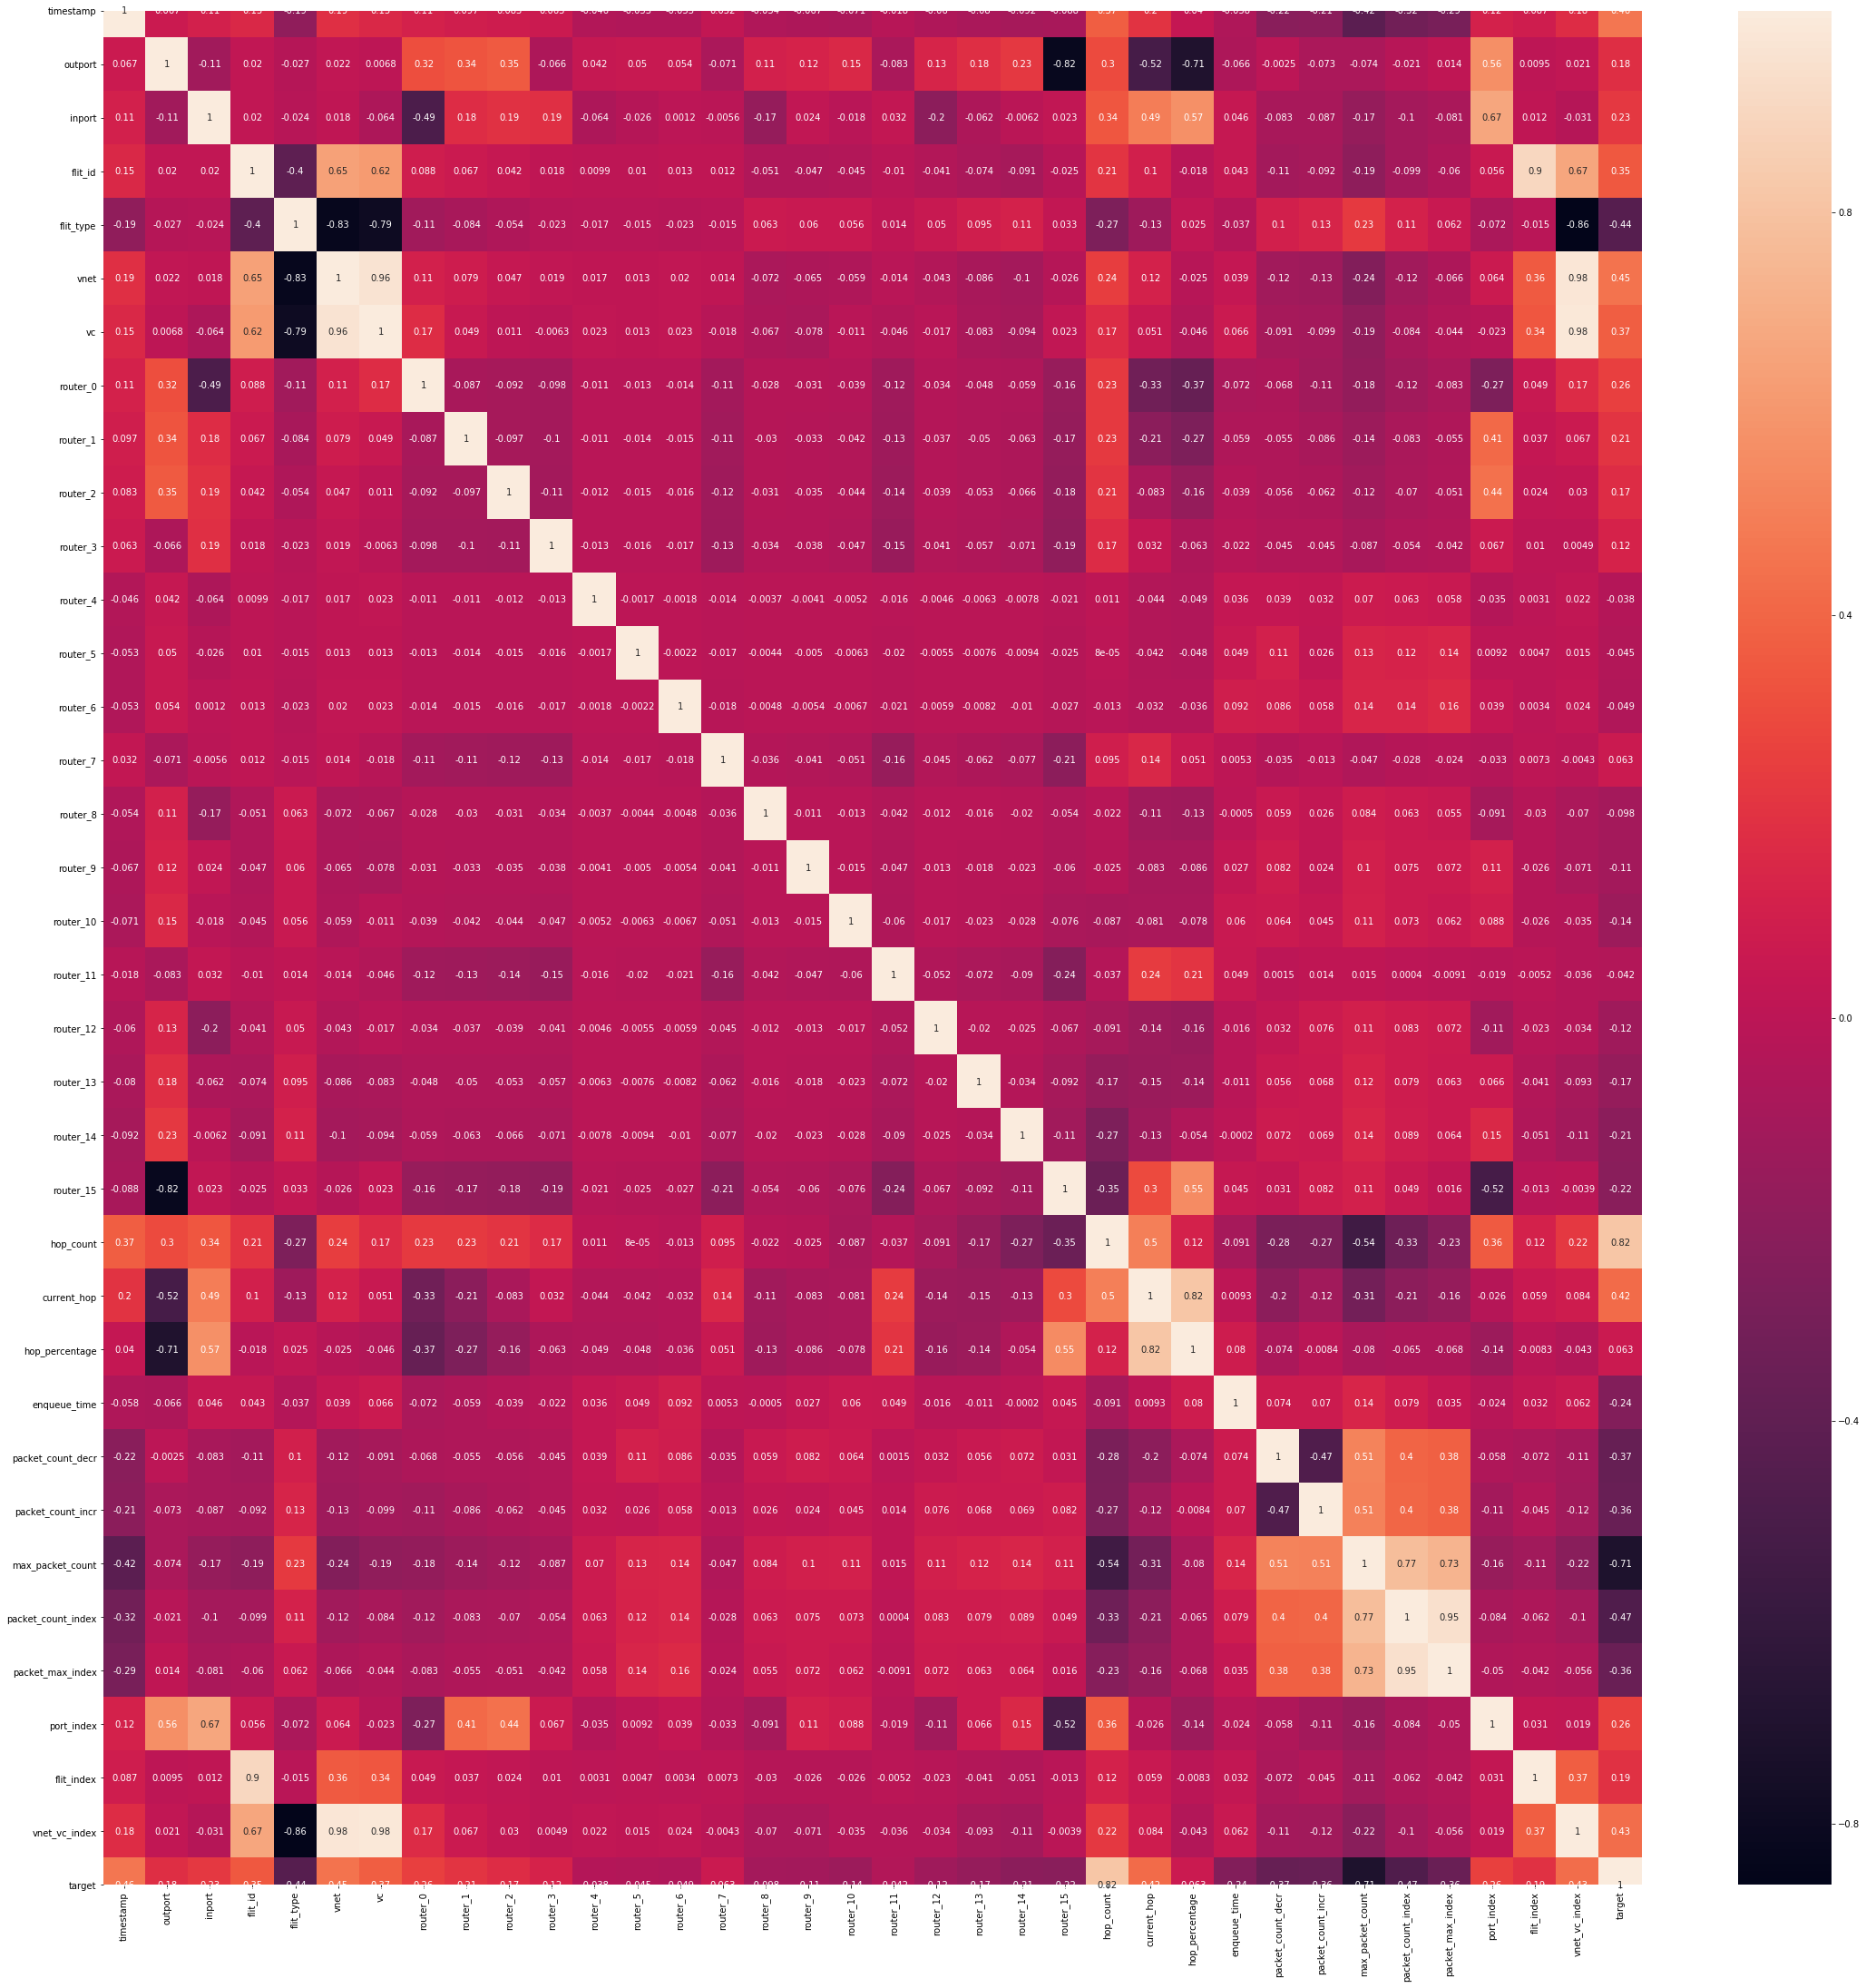

In [20]:
plt.figure(figsize=(38,38))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [21]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_index', 'vnet', 'packet_count_index']

Processing Dataset for Training

In [22]:
train_X = df.drop(columns=['target','timestamp','packet_max_index','vnet_vc_index','vc'])
train_X

outport  inport  flit_id  flit_type  vnet  router_0  router_1  \
0            2       0        1          4     2         0         0   
1            1       0        1          4     2         0         0   
2            1       0        1          4     2         0         0   
3            1       0        1          4     2         0         0   
4            2       0        1          1     3         0         0   
...        ...     ...      ...        ...   ...       ...       ...   
33001        1       3        1          4     2         0         0   
33002        1       4        5          3     3         0         0   
33003        2       4        4          2     3         0         0   
33004        1       3        4          2     3         0         0   
33005        2       4        5          3     3         0         1   

       router_2  router_3  router_4  ...  hop_count  current_hop  \
0             0         0       0.0  ...          4            0   
1             0         0       0.0  ...          1            0   
2             0         0       0.0  ...          1            0   
3             0         0       0.0  ...          1            0   
4             0         0       0.0  ...          4            0   
...         ...       ...       ...  ...        ...          ...   
33001         0         0       0.0  ...          6            5   
33002         0         1       0.0  ...          6            3   
33003         1         0       0.0  ...          6            2   
33004         0         0       0.0  ...          6            4   
33005         0         0       0.0  ...          6            1   

       hop_percentage  enqueue_time  packet_count_decr  packet_count_incr  \
0            0.000000             4                646                  1   
1            0.000000             4                645                  2   
2            0.000000             4                644                  3   
3            0.000000             4                643                  4   
4            0.000000             4                642                  5   
...               ...           ...                ...                ...   
33001        0.833333            24                  3                 46   
33002        0.500000            23                  2                 47   
33003        0.333333            16                  5                 44   
33004        0.666667            23                  4                 45   
33005        0.166667            16                  1                 48   

       max_packet_count  packet_count_index  port_index  flit_index  
0                   646                 646           0           4  
1                   646                1290           0           4  
2                   646                1932           0           4  
3                   646                2572           0           4  
4                   646                3210           0           1  
...                 ...                 ...         ...         ...  
33001                48                 138           3           4  
33002                48                  94           4          15  
33003                48                 220           8           8  
33004                48                 180           3           8  
33005                48                  48           8          15  

[33006 rows x 31 columns]

In [163]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

outport  inport  flit_id  ...  packet_count_index  port_index  flit_index
0          1.0    0.00     0.00  ...            0.005717       0.000    0.214286
1          0.5    0.00     0.00  ...            0.011873       0.000    0.214286
2          0.5    0.00     0.00  ...            0.018011       0.000    0.214286
3          0.5    0.00     0.00  ...            0.024129       0.000    0.214286
4          1.0    0.00     0.00  ...            0.030228       0.000    0.000000
...        ...     ...      ...  ...                 ...         ...         ...
33001      0.5    0.75     0.00  ...            0.000860       0.375    0.214286
33002      0.5    1.00     1.00  ...            0.000440       0.500    1.000000
33003      1.0    1.00     0.75  ...            0.001644       1.000    0.500000
33004      0.5    0.75     0.75  ...            0.001262       0.375    0.500000
33005      1.0    1.00     1.00  ...            0.000000       1.000    1.000000

[33006 rows x 31 columns]

In [164]:
train_X[train_X.duplicated()].shape

(46, 31)

In [165]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

outport    inport  ...  flit_index    target
outport             1.000000 -0.113402  ...    0.009469  0.181371
inport             -0.113402  1.000000  ...    0.012047  0.226172
flit_id             0.019620  0.020038  ...    0.899362  0.348721
flit_type          -0.027464 -0.023770  ...   -0.015131 -0.442219
vnet                0.021751  0.018156  ...    0.356563  0.450473
router_0            0.316635 -0.485370  ...    0.048517  0.255703
router_1            0.335671  0.177127  ...    0.037343  0.212578
router_2            0.354843  0.194387  ...    0.023518  0.171806
router_3           -0.065617  0.189801  ...    0.010138  0.122308
router_4            0.041813 -0.064096  ...    0.003122 -0.037763
router_5            0.050310 -0.025702  ...    0.004712 -0.045437
router_6            0.054236  0.001153  ...    0.003391 -0.048982
router_7           -0.071327 -0.005582  ...    0.007346  0.063211
router_8            0.108167 -0.165810  ...   -0.029694 -0.097688
router_9            0.121079  0.023687  ...   -0.026383 -0.109350
router_10           0.152320 -0.017629  ...   -0.025987 -0.137564
router_11          -0.082834  0.031849  ...   -0.005205 -0.042207
router_12           0.133512 -0.204661  ...   -0.023409 -0.120578
router_13           0.184326 -0.062332  ...   -0.040863 -0.166469
router_14           0.229278 -0.006237  ...   -0.050638 -0.207067
router_15          -0.822785  0.022791  ...   -0.012890 -0.215637
hop_count           0.296524  0.340411  ...    0.116358  0.816769
current_hop        -0.516934  0.494110  ...    0.058575  0.422401
hop_percentage     -0.706046  0.574890  ...   -0.008349  0.063365
enqueue_time       -0.065838  0.045501  ...    0.032460 -0.243594
packet_count_decr  -0.002467 -0.083239  ...   -0.072267 -0.369413
packet_count_incr  -0.073034 -0.087413  ...   -0.045326 -0.363752
max_packet_count   -0.073525 -0.166378  ...   -0.114685 -0.714833
packet_count_index -0.020738 -0.103001  ...   -0.061775 -0.471655
port_index          0.564434  0.671646  ...    0.030898  0.263426
flit_index          0.009469  0.012047  ...    1.000000  0.194825
target              0.181371  0.226172  ...    0.194825  1.000000

[32 rows x 32 columns]

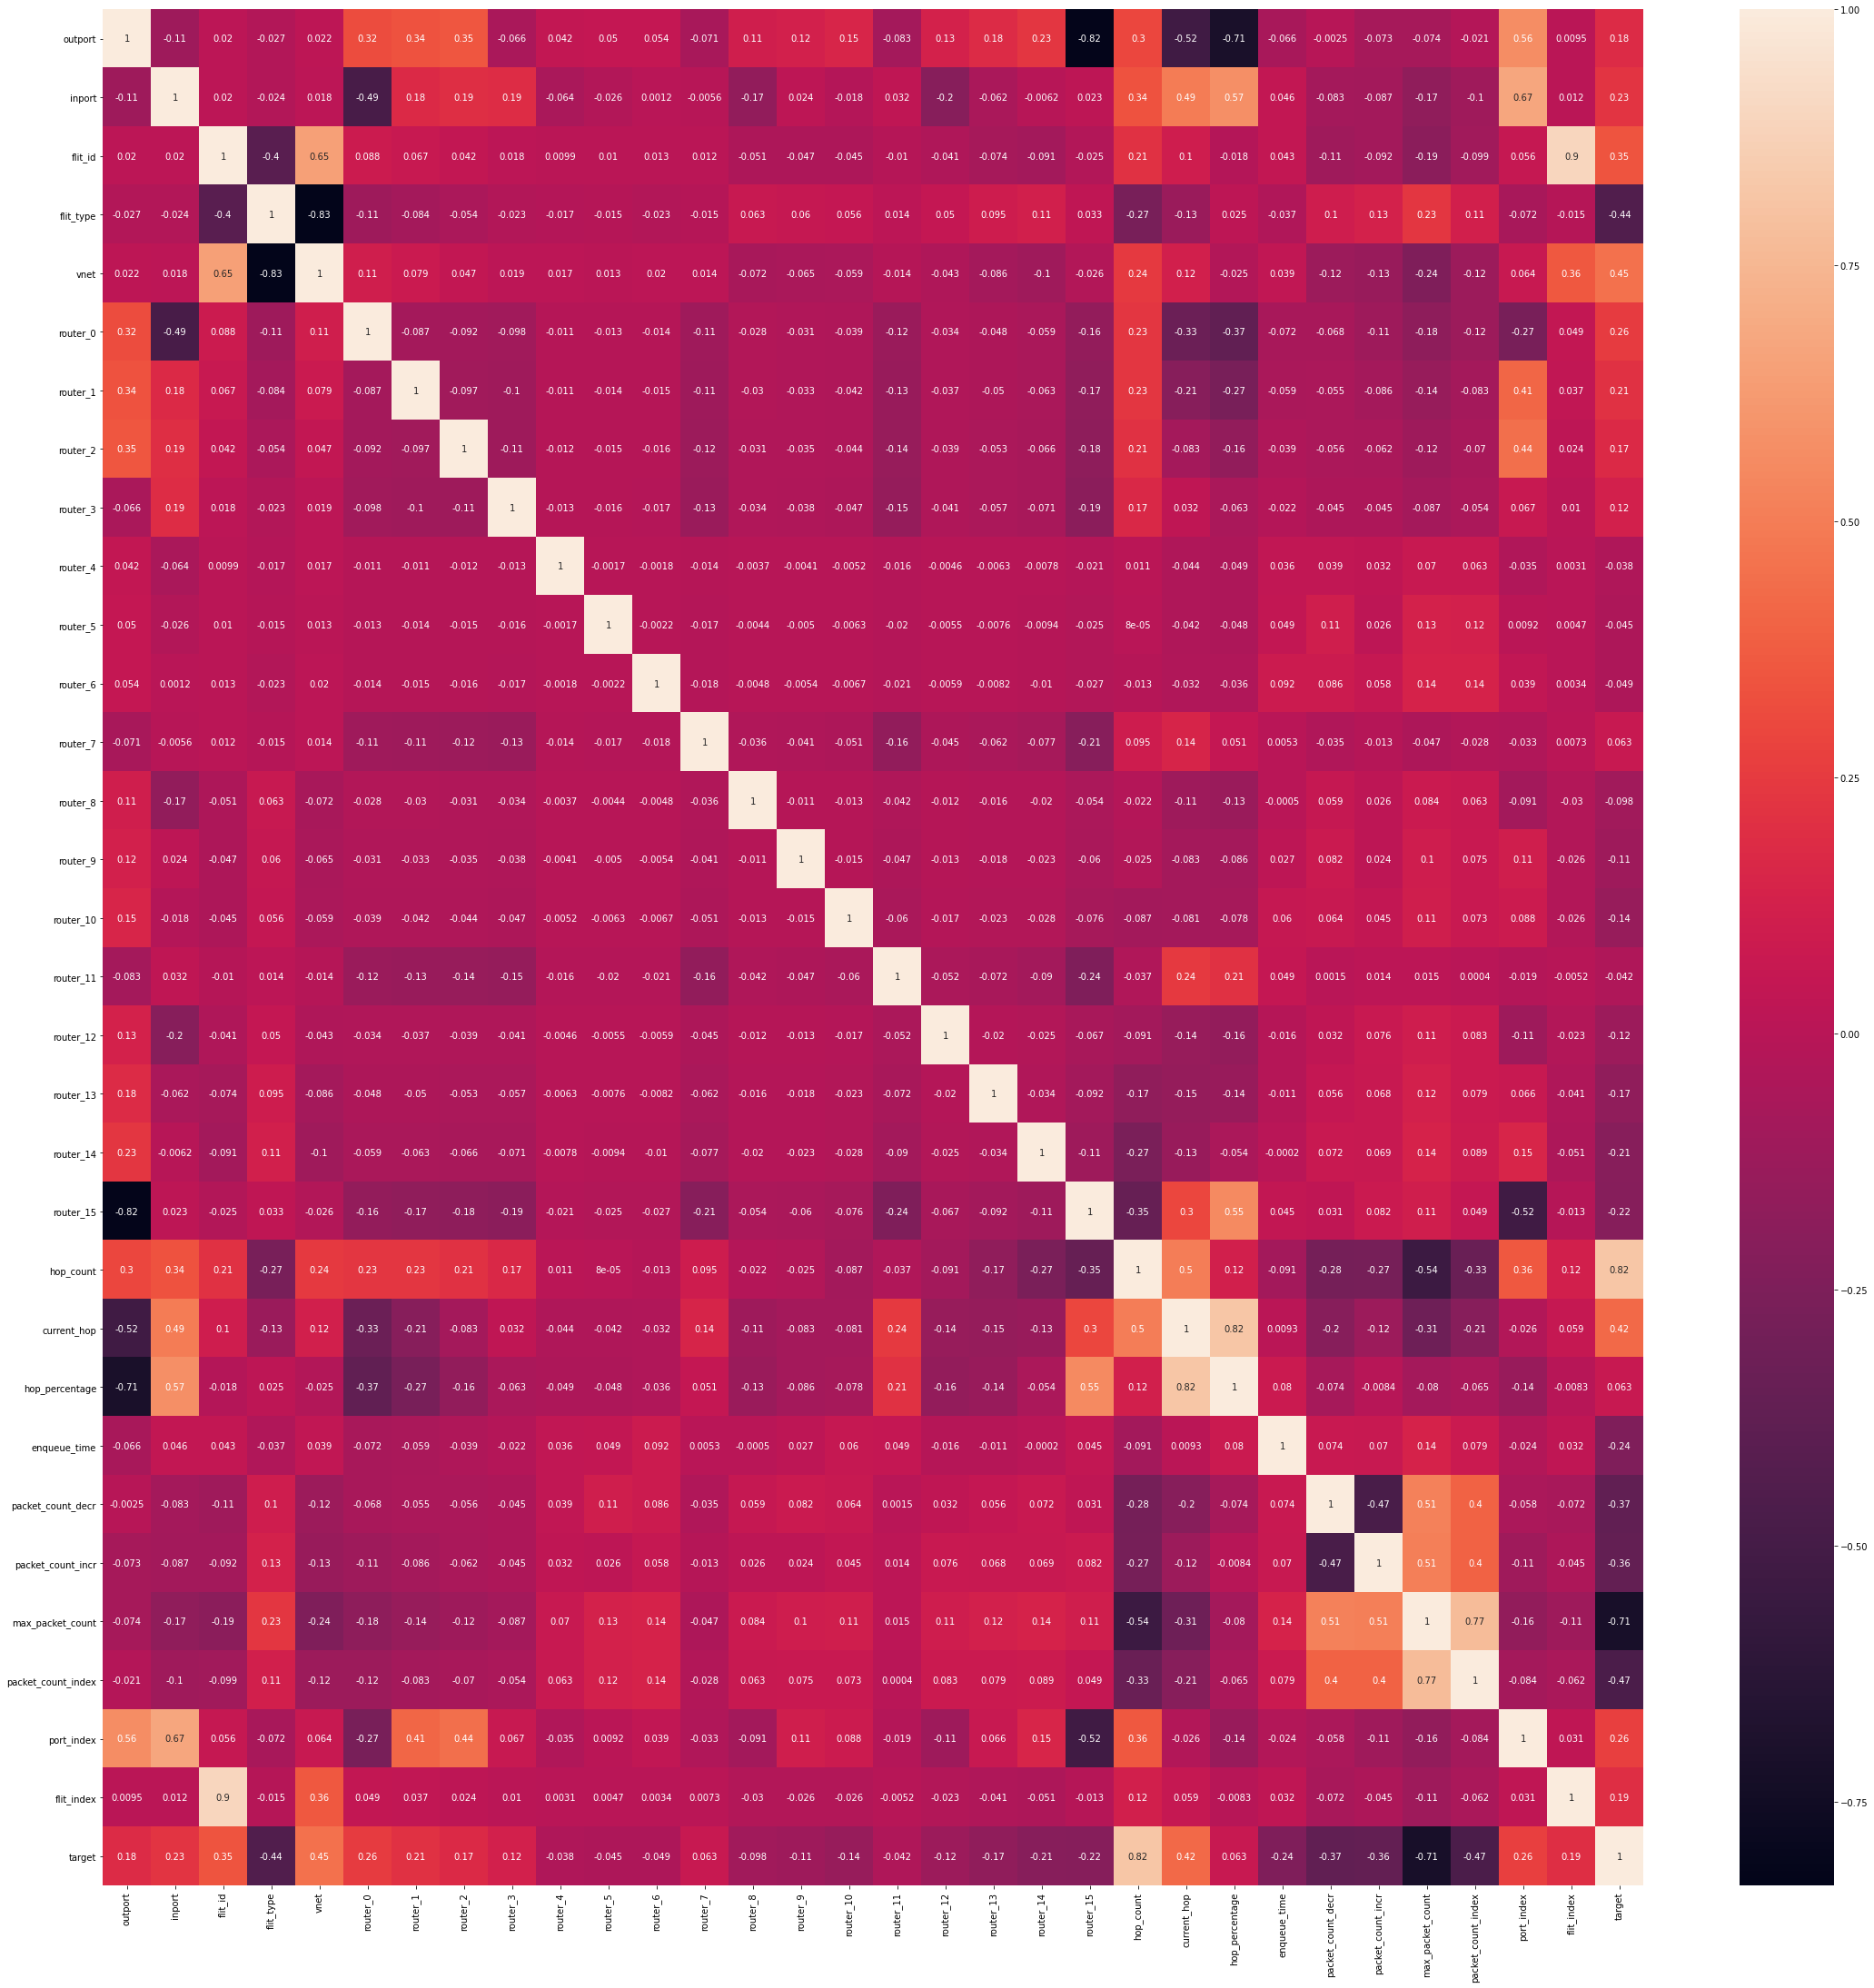

In [166]:
plt.figure(figsize=(38,38))
sns.heatmap(corr_df.corr(), annot = True)
plt.show()

In [167]:
columns_to_drop = find_correlation(corr_df.drop(columns=['target']))
columns_to_drop

[]

Principal Component Analysis

In [168]:
pca = PCA(0.95)
pca.fit(train_X)
principal_components = pca.transform(train_X)
principal_components

array([[-0.42091505,  1.0065636 ,  0.3864887 , ...,  0.48327457,
         0.85032812,  0.01652184],
       [-0.0316769 ,  1.04991232,  0.40144506, ...,  0.09826462,
         0.73426717,  0.04611133],
       [-0.03159053,  1.05018833,  0.4014793 , ...,  0.10050746,
         0.73317443,  0.04334559],
       ...,
       [-0.90294057, -0.89036704, -0.10988612, ..., -0.21301028,
        -0.10678278,  0.118286  ],
       [-0.07913313, -0.85211637,  0.27058904, ..., -0.17452308,
        -0.10599361,  0.15261333],
       [-1.0205805 , -0.81848896,  0.04548851, ..., -0.20793822,
        -0.11619905,  0.10896663]])

In [169]:
pca.explained_variance_ratio_

array([0.21766894, 0.1782177 , 0.14612892, 0.07557149, 0.06222323,
       0.0556894 , 0.05053321, 0.04733724, 0.03956011, 0.02397238,
       0.01606644, 0.01440688, 0.01261762, 0.01237556])

Text(0, 0.5, 'Variance')

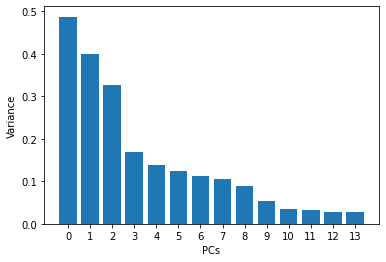

In [170]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [171]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

0         1         2   ...        11        12        13
0     -0.420915  1.006564  0.386489  ...  0.483275  0.850328  0.016522
1     -0.031677  1.049912  0.401445  ...  0.098265  0.734267  0.046111
2     -0.031591  1.050188  0.401479  ...  0.100507  0.733174  0.043346
3     -0.031504  1.050463  0.401513  ...  0.102744  0.732079  0.040586
4     -0.562703  0.423298  0.885257  ...  0.530442  0.847358 -0.022588
...         ...       ...       ...  ...       ...       ...       ...
33001  0.256498 -0.174230 -0.559131  ... -0.189573 -0.112252  0.189986
33002 -0.253276 -0.938751  0.148832  ... -0.185202 -0.113625  0.150596
33003 -0.902941 -0.890367 -0.109886  ... -0.213010 -0.106783  0.118286
33004 -0.079133 -0.852116  0.270589  ... -0.174523 -0.105994  0.152613
33005 -1.020581 -0.818489  0.045489  ... -0.207938 -0.116199  0.108967

[33006 rows x 14 columns]

In [172]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df.corr()

0             1  ...            13    target
0       1.000000e+00  9.049084e-16  ... -8.382191e-16 -0.268790
1       9.049084e-16  1.000000e+00  ... -2.271599e-16 -0.630735
2       1.424054e-15  1.350612e-15  ... -7.233744e-16  0.035920
3       1.937713e-15  1.035319e-16  ... -9.108957e-17  0.089364
4      -1.160976e-15  4.697721e-17  ...  1.948162e-16 -0.342377
5       1.913254e-16  5.735016e-16  ... -3.713983e-16 -0.082218
6      -4.483104e-16 -2.895545e-16  ... -7.559336e-17 -0.253188
7       9.820883e-16 -2.144647e-18  ... -7.464143e-16 -0.324740
8       1.926492e-16 -5.038024e-16  ...  3.547499e-18  0.101445
9      -1.538744e-16 -7.292147e-16  ...  4.039448e-16 -0.074325
10      3.011123e-15  3.803076e-16  ...  2.945745e-16  0.068951
11      2.897932e-16  1.055003e-16  ...  3.697720e-16 -0.152847
12      9.491088e-16  4.689408e-17  ...  9.406446e-16 -0.041393
13     -8.382191e-16 -2.271599e-16  ...  1.000000e+00  0.093020
target -2.687896e-01 -6.307347e-01  ...  9.302016e-02  1.000000

[15 rows x 15 columns]

In [ ]:
dimentional_components = pd.DataFrame()
dimentional_components['target'] = corr_df["target"]
dimentional_components['pca-one'] = principal_components[:,0]
dimentional_components['pca-two'] = principal_components[:,1] 
dimentional_components['pca-three'] = principal_components[:,2]

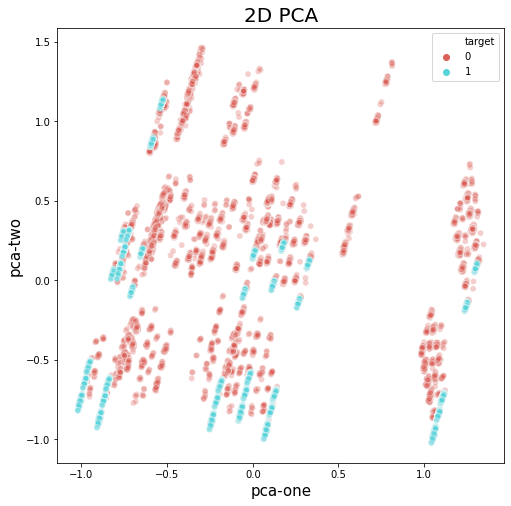

In [174]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

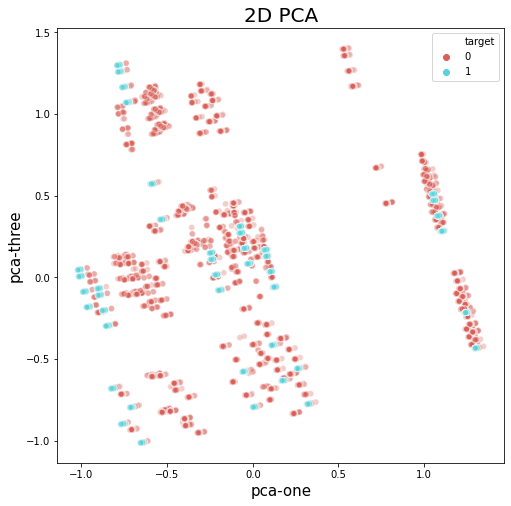

In [175]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-one", y="pca-three",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

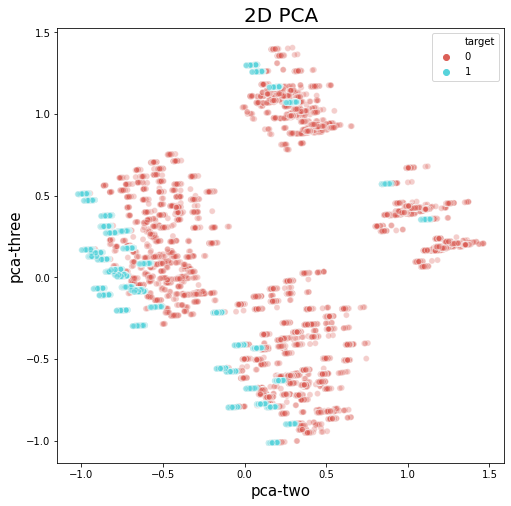

In [176]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-two", y="pca-three",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

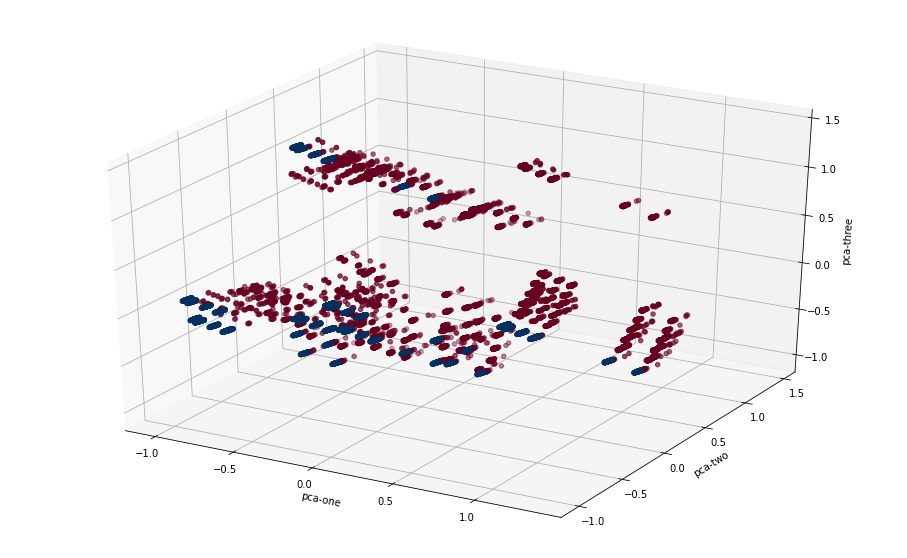

In [177]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-one'], 
    ys=dimentional_components['pca-two'], 
    zs=dimentional_components['pca-three'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

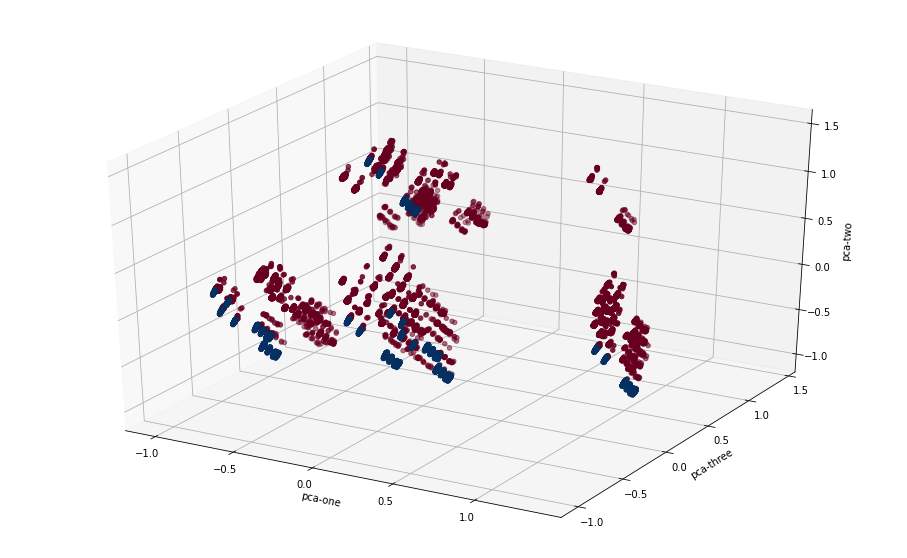

In [178]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-one'], 
    ys=dimentional_components['pca-three'], 
    zs=dimentional_components['pca-two'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-three')
ax.set_zlabel('pca-two')
plt.show()

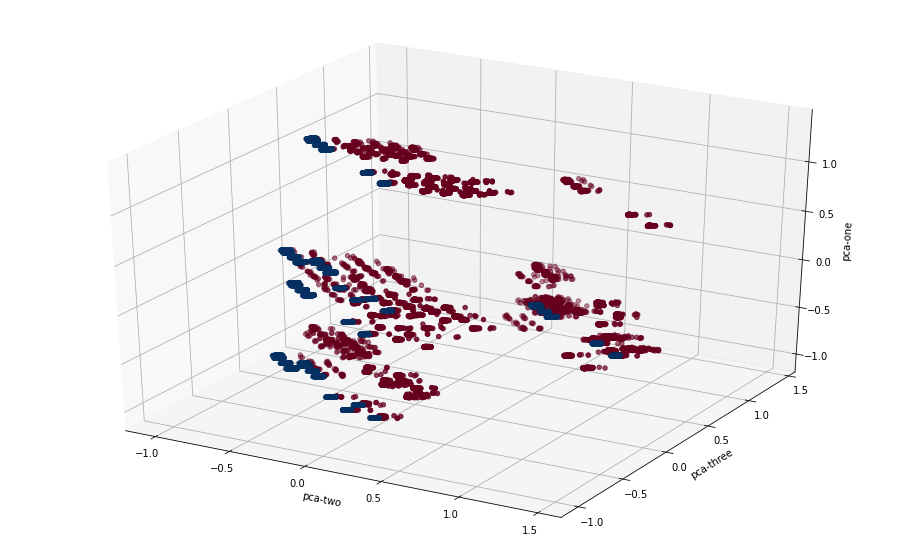

In [179]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-two'], 
    ys=dimentional_components['pca-three'], 
    zs=dimentional_components['pca-one'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-two')
ax.set_ylabel('pca-three')
ax.set_zlabel('pca-one')
plt.show()

T-distributed Stochastic Neighbor Embedding

In [180]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_components = tsne.fit_transform(train_X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 107.55306005477905 seconds


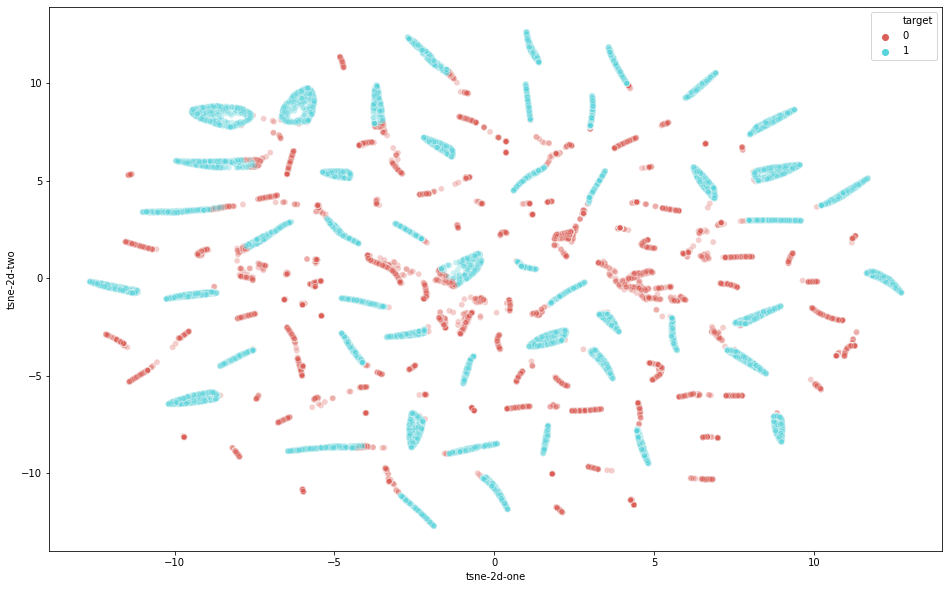

In [181]:
dimentional_components['tsne-2d-one'] = tsne_components[:,0]
dimentional_components['tsne-2d-two'] = tsne_components[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3
)

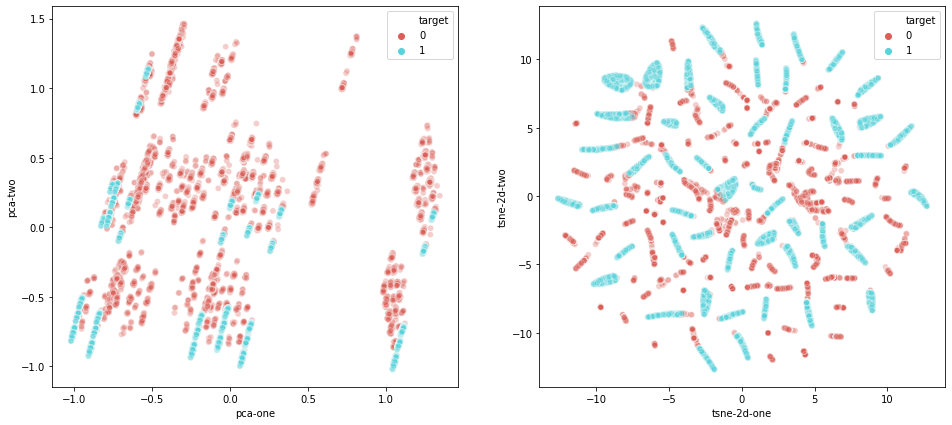

In [182]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [183]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_components = tsne.fit_transform(principal_components)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 96.25509333610535 seconds


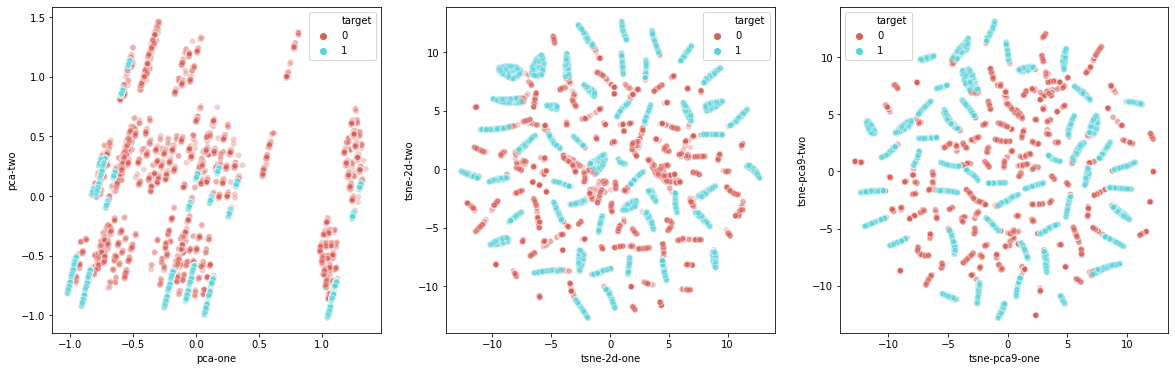

In [184]:
dimentional_components['tsne-pca9-one'] = tsne_pca_components[:,0]
dimentional_components['tsne-pca9-two'] = tsne_pca_components[:,1]
plt.figure(figsize=(20,6))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca9-one", y="tsne-pca9-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax3
)

#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [ ]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [186]:
train_Y = df['target']
train_Y.value_counts()

1    16503
0    16503
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [ ]:
seed = 5
np.random.seed(seed)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                 Specs        Score
21           hop_count  2408.280100
2              flit_id  1639.439267
4                 vnet  1628.622911
5             router_0  1590.902380
22         current_hop  1298.695914
6             router_1  1085.750735
19           router_14  1077.980614
3            flit_type   987.588202
27    max_packet_count   935.508708
20           router_15   900.843548
29          port_index   756.418451
18           router_13   712.042393
7             router_2   703.611970
28  packet_count_index   688.630333
15           router_10   487.917628
24        enqueue_time   443.884020
17           router_12   371.888436


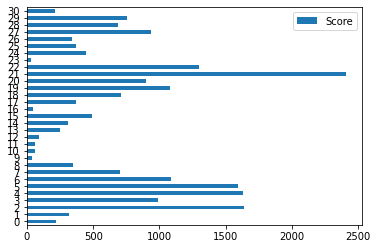

In [189]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [ ]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [192]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [193]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 99.69322829874262
Test Prediction  99.66676764616783


In [194]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

feature  importance
21           hop_count   15.809794
22         current_hop    9.653219
5             router_0    5.680799
4                 vnet    2.952367
0              outport    2.780789
6             router_1    2.613627
29          port_index    1.893251
8             router_3    1.187425
23      hop_percentage    1.025869
7             router_2    0.777370
30          flit_index    0.724882
2              flit_id    0.514512
17           router_12   -0.014129
9             router_4   -0.035356
13            router_8   -0.044479
1               inport   -0.185179
18           router_13   -0.345963
12            router_7   -0.465592
10            router_5   -0.509618
14            router_9   -0.662556
19           router_14   -0.999170
15           router_10   -1.284015
11            router_6   -1.604358
3            flit_type   -1.774170
20           router_15   -1.990965
16           router_11   -2.304561
28  packet_count_index   -5.795697
26   packet_count_incr   -9.976592
25   packet_count_decr  -10.410160
24        enqueue_time  -17.746580
27    max_packet_count  -21.988934

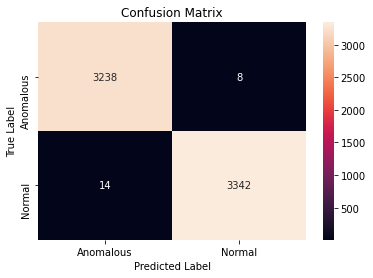

In [195]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [196]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3246
           1       1.00      1.00      1.00      3356

    accuracy                           1.00      6602
   macro avg       1.00      1.00      1.00      6602
weighted avg       1.00      1.00      1.00      6602



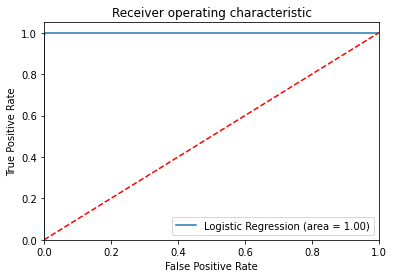

In [197]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

KNeighbors Classifier

In [198]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred_knn= knn.predict(X_test)

In [200]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 99.52658688077564
Test Prediction  99.31838836716148


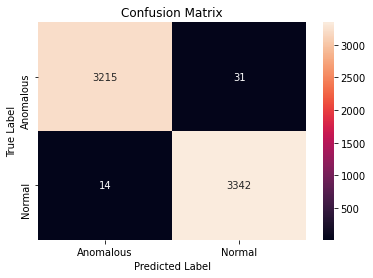

In [201]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [203]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3246
           1       0.99      1.00      0.99      3356

    accuracy                           0.99      6602
   macro avg       0.99      0.99      0.99      6602
weighted avg       0.99      0.99      0.99      6602



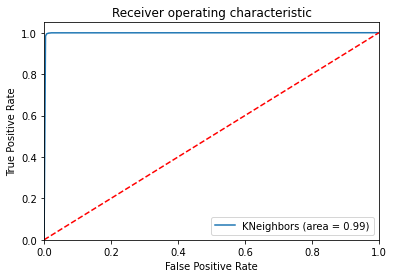

In [204]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

Naive Bayes Classifier

In [ ]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [206]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred_nb= nb.predict(X_test)

In [208]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 99.04938645659749
Test Prediction Score 99.01544986367767


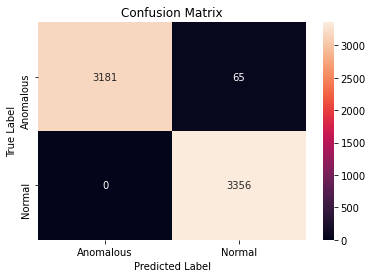

In [209]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [210]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3246
           1       0.98      1.00      0.99      3356

    accuracy                           0.99      6602
   macro avg       0.99      0.99      0.99      6602
weighted avg       0.99      0.99      0.99      6602



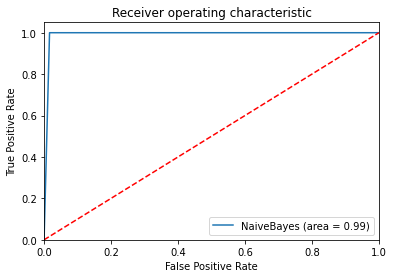

In [211]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [ ]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

2-Layer Neural Network

In [213]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 21123 samples, validate on 5281 samples
Epoch 1/10
21123/21123 [==============================] - 1s 44us/step - loss: 0.1727 - accuracy: 0.8193 - val_loss: 0.1015 - val_accuracy: 0.9748
Epoch 2/10
21123/21123 [==============================] - 1s 41us/step - loss: 0.0696 - accuracy: 0.9877 - val_loss: 0.0467 - val_accuracy: 0.9960
Epoch 3/10
21123/21123 [==============================] - 1s 41us/step - loss: 0.0362 - accuracy: 0.9942 - val_loss: 0.0269 - val_accuracy: 0.9966
Epoch 4/10
21123/21123 [==============================] - 1s 41us/step - loss: 0.0226 - accuracy: 0.9943 - val_loss: 0.0177 - val_accuracy: 0.9970
Epoch 5/10
21123/21123 [==============================] - 1s 42us/step - loss: 0.0157 - accuracy: 0.9947 - val_loss: 0.0126 - val_accuracy: 0.9975
Epoch 6/10
21123/21123 [==============================] - 1s 41us/step - loss: 0.0117 - accuracy: 0.9954 - val_loss: 0.0096 - val_accuracy: 0.9972
Epoch 7/10
21123/21123 [==============================] - 1s 40us/ste

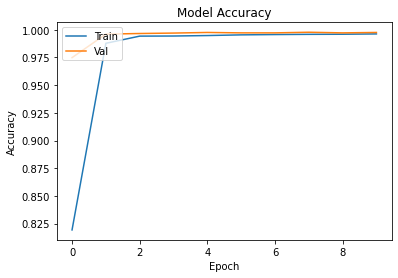

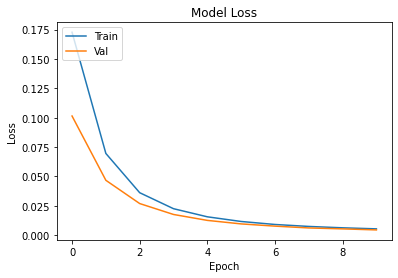

In [214]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [215]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 99.59%


3-Layer Neural Network

In [216]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2 )

Train on 21123 samples, validate on 5281 samples
Epoch 1/15
21123/21123 [==============================] - 1s 40us/step - loss: 0.2316 - accuracy: 0.5975 - val_loss: 0.2021 - val_accuracy: 0.7307
Epoch 2/15
21123/21123 [==============================] - 1s 37us/step - loss: 0.1735 - accuracy: 0.8484 - val_loss: 0.1439 - val_accuracy: 0.9191
Epoch 3/15
21123/21123 [==============================] - 1s 37us/step - loss: 0.1197 - accuracy: 0.9304 - val_loss: 0.0964 - val_accuracy: 0.9555
Epoch 4/15
21123/21123 [==============================] - 1s 37us/step - loss: 0.0811 - accuracy: 0.9699 - val_loss: 0.0663 - val_accuracy: 0.9828
Epoch 5/15
21123/21123 [==============================] - 1s 38us/step - loss: 0.0574 - accuracy: 0.9837 - val_loss: 0.0481 - val_accuracy: 0.9900
Epoch 6/15
21123/21123 [==============================] - 1s 38us/step - loss: 0.0432 - accuracy: 0.9878 - val_loss: 0.0374 - val_accuracy: 0.9894
Epoch 7/15
21123/21123 [==============================] - 1s 37us/ste

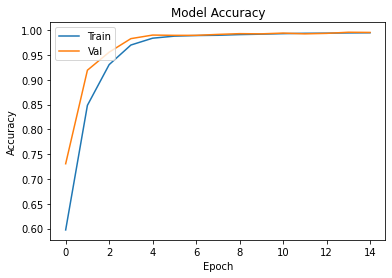

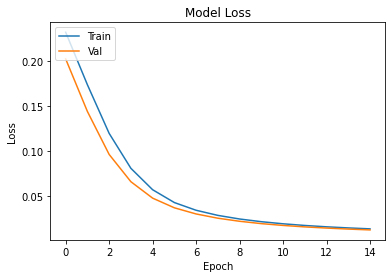

In [217]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [218]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 99.49%


4-Layer Neural Network



In [219]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 21123 samples, validate on 5281 samples
Epoch 1/30
21123/21123 [==============================] - 1s 40us/step - loss: 0.2503 - accuracy: 0.4437 - val_loss: 0.2498 - val_accuracy: 0.5662
Epoch 2/30
21123/21123 [==============================] - 1s 38us/step - loss: 0.2493 - accuracy: 0.5968 - val_loss: 0.2488 - val_accuracy: 0.5989
Epoch 3/30
21123/21123 [==============================] - 1s 38us/step - loss: 0.2478 - accuracy: 0.6109 - val_loss: 0.2464 - val_accuracy: 0.6470
Epoch 4/30
21123/21123 [==============================] - 1s 38us/step - loss: 0.2420 - accuracy: 0.7104 - val_loss: 0.2346 - val_accuracy: 0.7550
Epoch 5/30
21123/21123 [==============================] - 1s 39us/step - loss: 0.2194 - accuracy: 0.7588 - val_loss: 0.1984 - val_accuracy: 0.7874
Epoch 6/30
21123/21123 [==============================] - 1s 37us/step - loss: 0.1730 - accuracy: 0.8201 - val_loss: 0.1424 - val_accuracy: 0.8733
Epoch 7/30
21123/21123 [==============================] - 1s 38us/ste

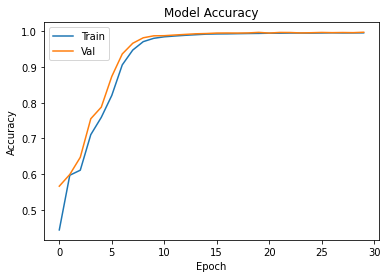

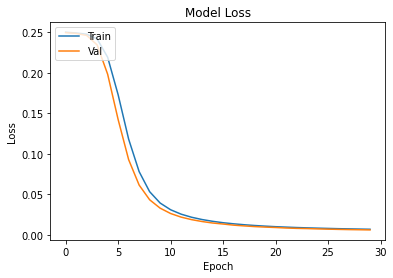

In [220]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [221]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 99.61%


5-Layer Neural Network Optimized

In [222]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 21123 samples, validate on 5281 samples
Epoch 1/100
21123/21123 [==============================] - 2s 91us/step - loss: 0.0243 - accuracy: 0.9739 - val_loss: 0.0047 - val_accuracy: 0.9938
Epoch 2/100
21123/21123 [==============================] - 1s 67us/step - loss: 0.0096 - accuracy: 0.9882 - val_loss: 0.0082 - val_accuracy: 0.9888
Epoch 3/100
21123/21123 [==============================] - 1s 66us/step - loss: 0.0091 - accuracy: 0.9885 - val_loss: 0.0055 - val_accuracy: 0.9926
Epoch 4/100
21123/21123 [==============================] - 1s 67us/step - loss: 0.0069 - accuracy: 0.9910 - val_loss: 0.0049 - val_accuracy: 0.9917
Epoch 5/100
21123/21123 [==============================] - 1s 67us/step - loss: 0.0060 - accuracy: 0.9928 - val_loss: 0.0073 - val_accuracy: 0.9917
Epoch 6/100
21123/21123 [==============================] - 1s 68us/step - loss: 0.0060 - accuracy: 0.9927 - val_loss: 0.0037 - val_accuracy: 0.9949
Epoch 7/100
21123/21123 [==============================] - 1s 6

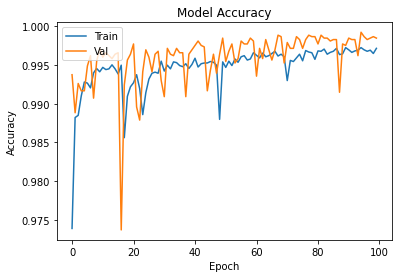

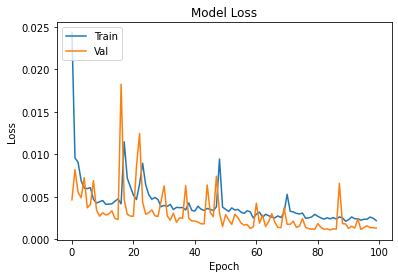

In [223]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [224]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 99.76%


Decision Tree Classifier

In [ ]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [262]:
# GridSearchCV
param_grid={'max_depth':range(0,30,2) ,
            'max_features':range(0,30,2)}
dt_g=DecisionTreeClassifier(random_state = 42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=3,scoring='accuracy',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

Best parameters: {'max_depth': 10, 'max_features': 28}
Accuracy : 0.9998863851540009


In [263]:
dt = DecisionTreeClassifier(max_depth=30,max_features=30,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=30, max_features=30, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y_pred_dt= dt.predict(X_test)

In [265]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 100.0
Test Prediction Score 100.0


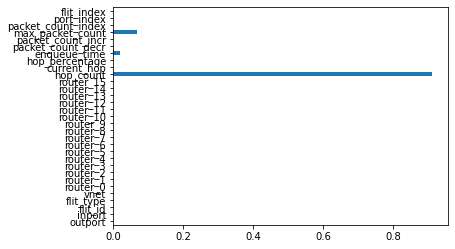

In [266]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

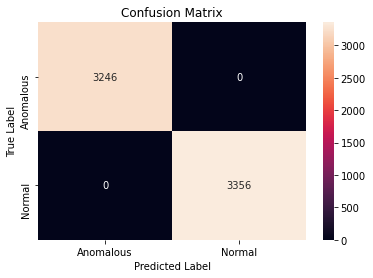

In [267]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [268]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3246
           1       1.00      1.00      1.00      3356

    accuracy                           1.00      6602
   macro avg       1.00      1.00      1.00      6602
weighted avg       1.00      1.00      1.00      6602



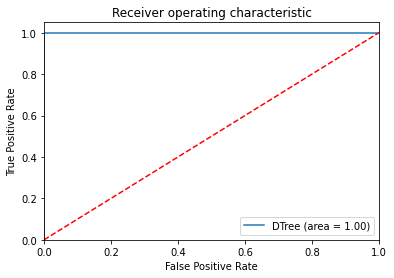

In [269]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [ ]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# GridSearchCV
param_grid={'max_depth':range(0,30,2),
            'n_estimators':[125,250],
            'max_features':range(0,25,2)}
dt_g=RandomForestClassifier(random_state=42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=10,scoring='f1_micro',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

In [271]:
rf = RandomForestClassifier(max_depth=30,max_features=30,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features=30,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_rf= rf.predict(X_test)

In [273]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 100.0
Test Prediction Score 100.0


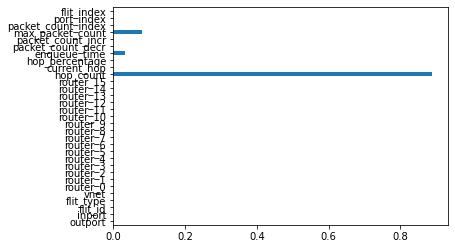

In [274]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

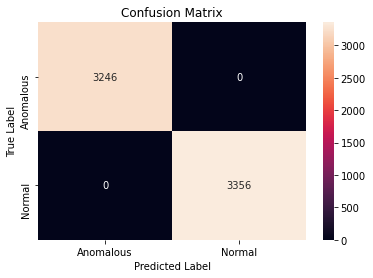

In [275]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [276]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3246
           1       1.00      1.00      1.00      3356

    accuracy                           1.00      6602
   macro avg       1.00      1.00      1.00      6602
weighted avg       1.00      1.00      1.00      6602



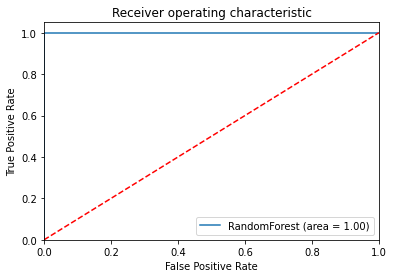

In [277]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [ ]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [ ]:
# GridSearchCV
param_grid={'max_depth':range(0,25,2),
            'n_estimators':[125,250,500],
           'min_child_weight':[1,3,6]}
xgb_g=XGBClassifier(random_state=42)
xgb_cv=GridSearchCV(xgb_g,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
xgb_cv.fit(X_train,y_train)

print("Best parameters:",xgb_cv.best_params_)
print("Accuracy :",xgb_cv.best_score_)

In [279]:
xgbc = XGBClassifier(max_depth=30,min_child_weight=1,n_estimators=500,random_state=42)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=30,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred_xgbc= xgbc.predict(X_test)

In [281]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 100.0
Test Prediction Score 100.0


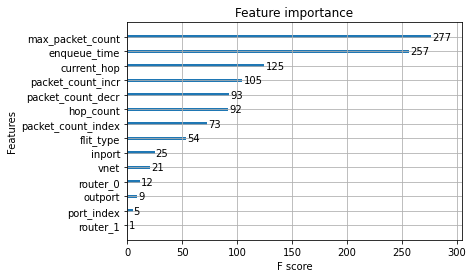

In [282]:
plot_importance(xgbc)
plt.show()

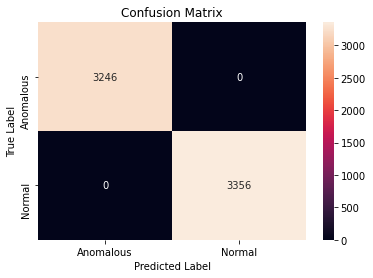

In [283]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [284]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3246
           1       1.00      1.00      1.00      3356

    accuracy                           1.00      6602
   macro avg       1.00      1.00      1.00      6602
weighted avg       1.00      1.00      1.00      6602



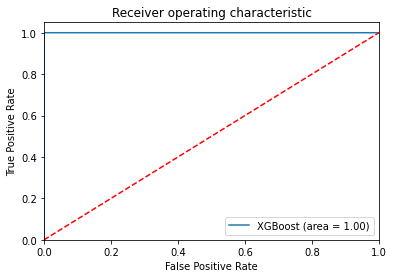

In [285]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [ ]:
#lightgbm
import lightgbm as lgb

In [ ]:
# GridSearchCV
param_grid = {'n_estimators': [x for x in range(24,40,2)],
              'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
lgb_g = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', n_estimators = 20, num_leaves = 38)
lgb_cv = GridSearchCV(lgb_g, param_grid,cv=10)
lgb_cv.fit(X_train, y_train)

print("Best parameters:",lgb_cv.best_params_)
print("Accuracy :",lgb_cv.best_score_)

In [287]:
gbm = lgb.LGBMClassifier(learning_rate = 0.2,  n_estimators = 500, max_depth = 30, random_state=42, min_child_weight=1,metric='l2')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=30,
               metric='l2', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [ ]:
y_pred_gbm= gbm.predict(X_test)

In [289]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 100.0
Test Prediction Score 100.0


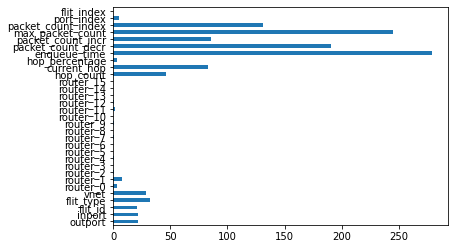

In [290]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

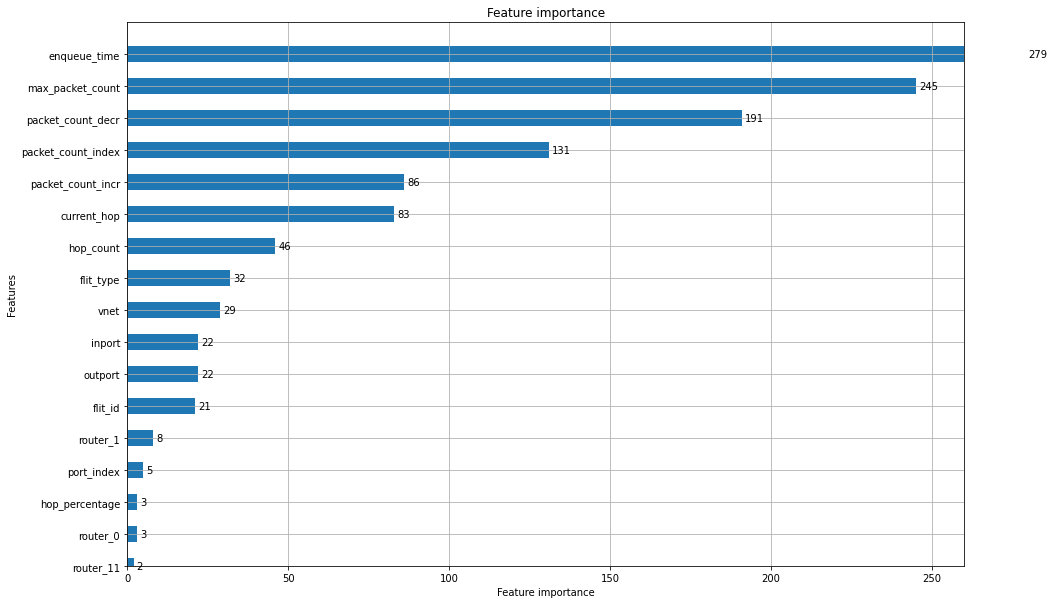

In [291]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,260), ylim = (0,17), figsize = (15,10))
plt.show()

In [292]:
sorted(gbm.feature_importances_,reverse=True)

[279,
 245,
 191,
 131,
 86,
 83,
 46,
 32,
 29,
 22,
 22,
 21,
 8,
 5,
 3,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

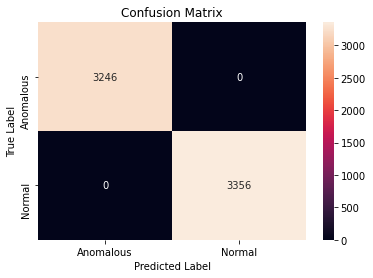

In [293]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [294]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3246
           1       1.00      1.00      1.00      3356

    accuracy                           1.00      6602
   macro avg       1.00      1.00      1.00      6602
weighted avg       1.00      1.00      1.00      6602



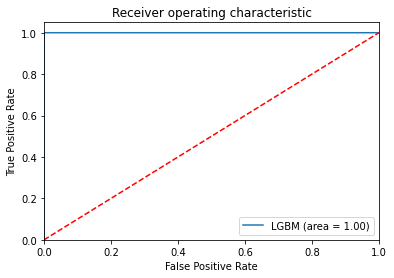

In [295]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()